# H2O Model

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_411"; Java(TM) SE Runtime Environment (build 1.8.0_411-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.411-b09, mixed mode)
  Starting server from /Users/sunnygao/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/rn/l2tch0d14t10b6sh58c23xfm0000gn/T/tmplofk9ps3
  JVM stdout: /var/folders/rn/l2tch0d14t10b6sh58c23xfm0000gn/T/tmplofk9ps3/h2o_sunnygao_started_from_python.out
  JVM stderr: /var/folders/rn/l2tch0d14t10b6sh58c23xfm0000gn/T/tmplofk9ps3/h2o_sunnygao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_sunnygao_omvor5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:18:57.330: Project: AutoML_1_20240504_171857
17:18:57.332: 5-fold cross-validation will be used.
17:18:57.332: Setting stopping tolerance adaptively based on the training frame: 0.010447889204149373
17:18:57.332: Build control seed: 1
17:18:57.334: training frame: Frame key: AutoML_1_20240504_171857_training_py_2_sid_a7fe    cols: 21    rows: 9161  chunks: 1    size: 356649  checksum: -4950723623743781768
17:18:57.334: validation frame: NULL
17:18:57.334: leaderboard frame: NULL
17:18:57.334: blending frame: NULL
17:18:57.334: response column: Order Item Quantity
17:18:57.334: fold column: null
17:18:57.334: weights column: null
17:18:57.362: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2

/Users/sunnygao/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model saved to: /Users/sunnygao/Desktop/INSY695-078/final_project/models/XGBoost_3_AutoML_1_20240504_171857
{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'XGBoost_3_AutoML_1_20240504_171857', 'type': 'Key<Model>', 'URL': '/3/Models/XGBoost_3_AutoML_1_20240504_171857'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240504_171857_training_py_2_sid_a7fe', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240504_171857_training_py_2_sid_a7fe'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240504_171857_training_py_2_sid_a7fe', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240504_171857_training_py_2_sid_a7fe'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds':

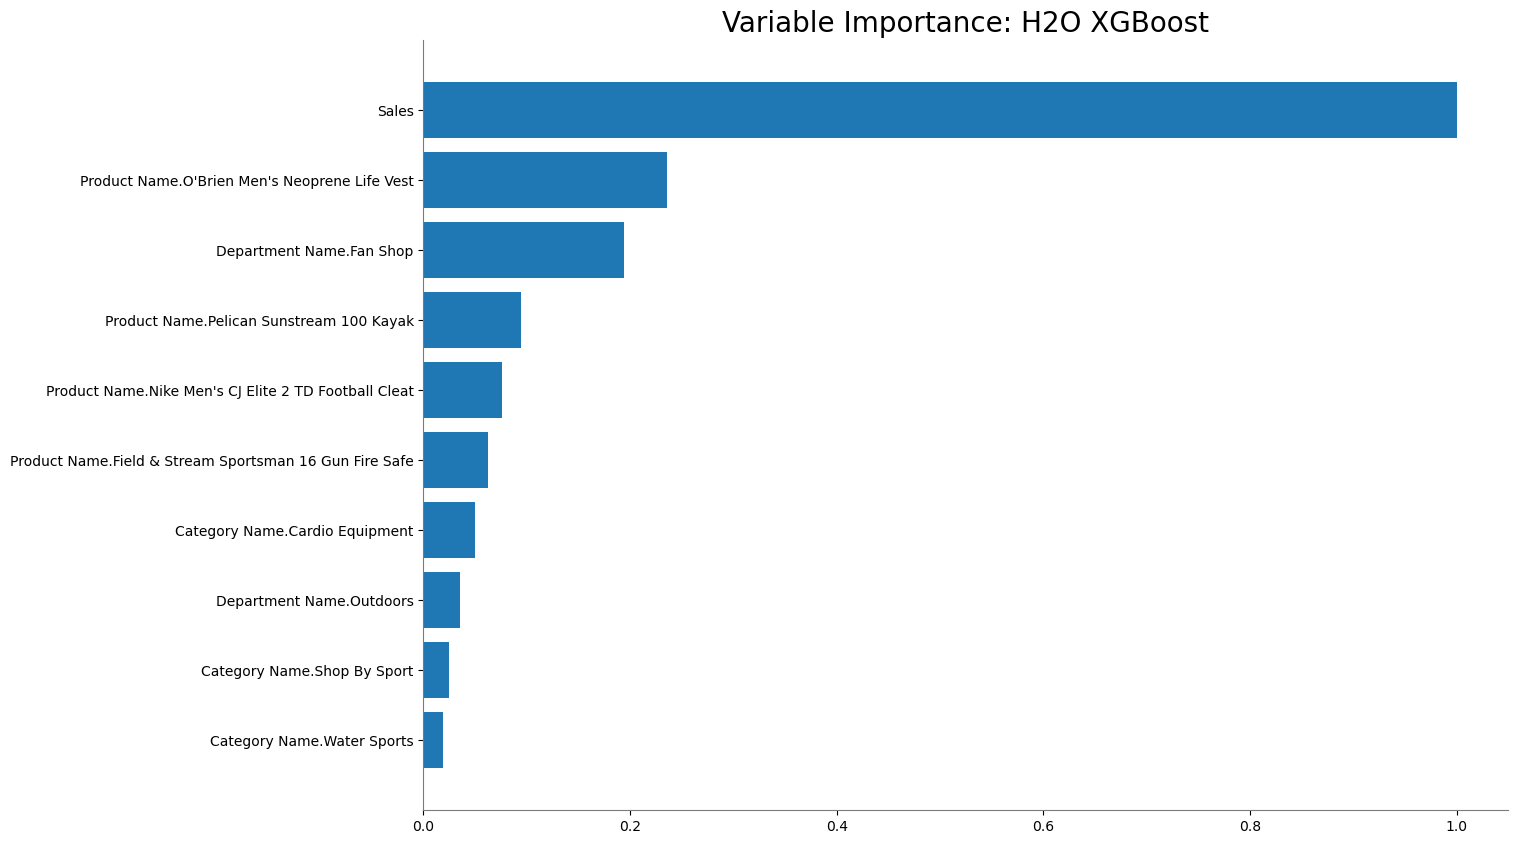

Saving figure varimp_plot


/Users/sunnygao/anaconda3/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


<Figure size 640x480 with 0 Axes>

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
import mlflow
import mlflow.h2o
from pathlib import Path
import matplotlib.pyplot as plt
import pickle

# Function definitions for data loading, saving, and plotting
DATA_PATH = Path() / "../final_project/data"
DATA_PATH.mkdir(parents=True, exist_ok=True)

def load_csv(filename, data_path=DATA_PATH, encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path, encoding=encoding)

def save_csv(data, filename, data_path=DATA_PATH, encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False, encoding=encoding)

PLOT_PATH = Path() / "../final_project/plot"
PLOT_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

RESULT_PATH = Path() / "../final_project/result"
RESULT_PATH.mkdir(parents=True, exist_ok=True)

def save_result(data, filename, data_path=RESULT_PATH):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False, encoding='utf-8-sig')

MODEL_PATH = Path() / "../final_project/models"
MODEL_PATH.mkdir(parents=True, exist_ok=True)

def save_h2o_model(model, filename, model_path=MODEL_PATH):
    full_path = model_path / filename
    full_path.parent.mkdir(parents=True, exist_ok=True)
    saved_model_path = h2o.save_model(model=model, path=str(full_path.parent), force=True)
    print(f"Model saved to: {saved_model_path}")
    return saved_model_path

# Custom transformer for reading data
class DataReader(BaseEstimator, TransformerMixin):
    def __init__(self, filename):
        self.filename = filename
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.read_csv(self.filename, encoding='ISO-8859-1')

# Custom transformer for MLflow experiment
class MLflowExperimentTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_models=12, exclude_algos=["StackedEnsemble"], seed=1):
        self.max_models = max_models
        self.exclude_algos = exclude_algos
        self.seed = seed
    
    def fit(self, df):
        # Initialize H2O
        h2o.init()

        # H2O Frame
        hf_dataset = h2o.H2OFrame(df)
        train, test = hf_dataset.split_frame(ratios=[0.6], seed=1)

        # Define the target and features
        y = "Order Item Quantity"
        X = hf_dataset.columns
        X.remove(y)

        # Start MLflow experiment
        with mlflow.start_run():
            # Configure and run H2O AutoML
            h2o_aml = H2OAutoML(max_models=self.max_models, seed=self.seed, exclude_algos=self.exclude_algos, verbosity="info")
            h2o_aml.train(x=X, y=y, training_frame=train)

            # Log model
            mlflow.h2o.log_model(h2o_aml.leader, "model")

            # Now, save the model using the new function
            model_filename = "best_model_demand_forcasting"
            full_path = MODEL_PATH / model_filename
            full_path.parent.mkdir(parents=True, exist_ok=True)
            saved_model_path = h2o.save_model(model=h2o_aml.leader, path=str(full_path.parent), force=True)
            print(f"Model saved to: {saved_model_path}")

            # Logging parameters and metrics
            mlflow.log_params({
                "max_models": self.max_models,
                "exclude_algos": ",".join(self.exclude_algos),
                "seed": self.seed
            })

            # Access performance metrics from the leaderboard
            perf = h2o_aml.leader.model_performance(test)
            mlflow.log_metrics({
                "rmse": perf.rmse(),
                "mae": perf.mae(),
                "r2": perf.r2()
            })
            
            # Best parameters
            leader_params = h2o_aml.leader.params
            print(leader_params)

            # Variable importance plot
            h2o_aml.leader.varimp_plot()
            save_fig("varimp_plot")

            # Log the leaderboard
            lb = h2o_aml.leaderboard.as_data_frame()
            save_result(lb, "leaderboard.csv")
            mlflow.log_artifact("leaderboard.csv")
            
            with open('demand_forecast_model.pkl', 'wb') as file:
                pickle.dump(h2o_aml, file)

            # End run
            mlflow.end_run()

        return self
    
    def transform(self, X):
        # Dummy transform method
        return X

# Pipeline definition
data_pipeline = Pipeline([
    ('load_data', DataReader(filename="data/Q1_2015_demand_forecast.csv")),
    ('mlflow_experiment', MLflowExperimentTransformer(max_models=12, exclude_algos=["StackedEnsemble"], seed=1))
])

# Load data
#supplyChain = load_csv("Q1_2015_demand_forecast.csv")

# Execute the pipeline
processed_data = data_pipeline.fit_transform(X=None)

In [5]:
future = pd.read_csv("data/future_demand_forecast.csv")
future_df = h2o.H2OFrame(future)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Load the model and make predictions

Not using pickle, instead, using h2o load model

In [11]:
import h2o

# Initialize H2O
h2o.init()

# Load the H2O model
demand_forecast_model = h2o.load_model("best_model_demand_forecasting/XGBoost_3_AutoML_11_20240503_220319")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,13 mins 33 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_sunnygao_omvor5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.420 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [12]:
pred= demand_forecast_model.predict(future_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/Users/sunnygao/anaconda3/lib/python3.11/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'Customer City' has levels not trained on: ["Alhambra", "Alpharetta", "Arecibo", "Arlington Heights", "Bay Shore", "Birmingham", "Buena Park", "CA", "Cayey", "Chambersburg", ...17 not listed..., "Palmdale", "Reno", "Rialto", "Richardson", "Sanford", "Spring", "Stafford", "Sumner", "Temecula", "Wilmington"]
  warnings.warn(w)
/Users/sunnygao/anaconda3/lib/python3.11/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'Order City' has levels not trained on: ["Aachen", "Aalen", "Aalst", "Aba", "Abadan", "Abakaliki", "Abbeville", "Abbotsford", "Abeokuta", "Aberdeen", ...3227 not listed..., "Zlatoust", "Zunyi", "Zurich", "Zwedru", "Zwickau", "Zwolle", "eMbalenhle", "Águas Lindas de Goiás", "Çanakkale", "Ústí nad Labem"]
  warnings.warn(w)
/Users/sunnygao/anaconda3/lib/python3.11/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset column 'Order 

In [13]:
pred

predict
0.998508
0.992804
0.992804
3.99419
2.99568
3.98783
5.00022
3.99419
3.99419
4.00352
